In [1]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

/Users/aminerazig/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
import xarray as xr
import pandas as pd
import os

# Chemin vers le dossier contenant les fichiers .nc
data_dir = "/Users/aminerazig/Desktop/M2DS/ML with graphs /Machine-Learning-with-Graphs-Project-Probabilistic-Weather-Forecasting-with-Hierarchical-GNNs/data/"

# Liste des fichiers .nc
nc_files = [
    "2m_temperature_0_daily-mean.nc",
    "10m_u_component_of_wind_stream-oper_daily-mean.nc",
    "10m_v_component_of_wind_0_daily-mean.nc",
    "total_precipitation_0_daily-mean.nc"
]

# Charger les fichiers NetCDF dans un dictionnaire de datasets
datasets = {}
for file in nc_files:
    file_path = os.path.join(data_dir, file)
    ds = xr.open_dataset(file_path)
    datasets[file] = ds
    print(f"Fichier chargé : {file}")
    print(ds)  # Afficher la structure du fichier

# Exemple : Explorer les données de température
temp_ds = datasets["2m_temperature_0_daily-mean.nc"]
print("Variables disponibles :", list(temp_ds.variables))
print("Dimensions :", temp_ds.dims)
print("Coordonnées :", temp_ds.coords)

# Convertir en DataFrame pour manipulation
temp_df = temp_ds.to_dataframe().reset_index()
print(temp_df.head())

# Nettoyer les données (exemple : supprimer les NaN)
temp_df_cleaned = temp_df.dropna()
print("Données nettoyées :")
print(temp_df_cleaned.head())

# Fusionner les données de plusieurs fichiers (exemple : température et vent)
u_wind_ds = datasets["10m_u_component_of_wind_stream-oper_daily-mean.nc"]
v_wind_ds = datasets["10m_v_component_of_wind_0_daily-mean.nc"]

# Convertir en DataFrames
u_wind_df = u_wind_ds.to_dataframe().reset_index()
v_wind_df = v_wind_ds.to_dataframe().reset_index()

# Fusionner les DataFrames sur les colonnes communes (exemple : time, latitude, longitude)
# Fusionner les DataFrames sur les colonnes communes (exemple : time, latitude, longitude)
merged_df = pd.merge(temp_df_cleaned, u_wind_df, on=["valid_time", "latitude", "longitude"])
merged_df = pd.merge(merged_df, v_wind_df, on=["valid_time", "latitude", "longitude"])
print("Données fusionnées :")
print(merged_df.head())

Fichier chargé : 2m_temperature_0_daily-mean.nc
<xarray.Dataset>
Dimensions:     (valid_time: 31, latitude: 10, longitude: 20)
Coordinates:
    number      int64 ...
  * latitude    (latitude) float64 50.61 50.36 50.11 49.86 ... 48.86 48.61 48.36
  * longitude   (longitude) float64 -1.46 -1.21 -0.96 -0.71 ... 2.79 3.04 3.29
  * valid_time  (valid_time) datetime64[ns] 2024-10-01 2024-10-02 ... 2024-10-31
Data variables:
    t2m         (valid_time, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-03-18T09:16 GRIB to CDM+CF via cfgrib-0.9.1...
Fichier chargé : 10m_u_component_of_wind_stream-oper_daily-mean.nc
<xarray.Dataset>
Dimensions:     (valid_time: 31, latitude: 10, longitude: 20)
Coordinates:
  

In [6]:
merged_df

valid_time  latitude  longitude         t2m  number_x       u10  \
0    2024-10-01     50.61      -1.46  287.027130         0  5.891641   
1    2024-10-01     50.61      -1.21  286.772522         0  6.031213   
2    2024-10-01     50.61      -0.96  287.039825         0  6.910450   
3    2024-10-01     50.61      -0.71  287.251373         0  7.634367   
4    2024-10-01     50.61      -0.46  287.338379         0  8.157102   
...         ...       ...        ...         ...       ...       ...   
6195 2024-10-31     48.36       2.29  283.436798         0 -2.174011   
6196 2024-10-31     48.36       2.54  283.398285         0 -2.063164   
6197 2024-10-31     48.36       2.79  283.367462         0 -2.001111   
6198 2024-10-31     48.36       3.04  283.360077         0 -2.027885   
6199 2024-10-31     48.36       3.29  283.306671         0 -1.982038   

      number_y       v10  number  
0            0 -4.007300       0  
1            0 -3.749726       0  
2            0 -3.886445       0  
3            0 -4.007127       0  
4            0 -4.026770       0  
...        ...       ...     ...  
6195         0 -0.324510       0  
6196         0 -0.320021       0  
6197         0 -0.285348       0  
6198         0 -0.257127       0  
6199         0 -0.226397       0  

[6200 rows x 9 columns]

/Users/aminerazig/anaconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/aminerazig/anaconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


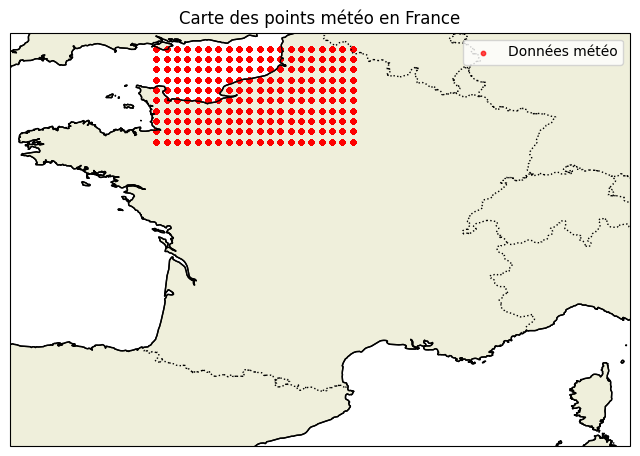

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter les frontières des pays et côtes
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')

# Centrer sur la France
ax.set_extent([-5, 10, 41, 51])  # [lon_min, lon_max, lat_min, lat_max]

# Ajouter les points météo
ax.scatter(merged_df["longitude"], merged_df["latitude"], color='red', s=10, label="Données météo", alpha=0.7)

# Ajouter une légende et un titre
plt.legend()
plt.title("Carte des points météo en France")

# Sauvegarder l'image en PNG
plt.savefig("carte_meteo.png", dpi=300)
plt.show()


In [7]:
import folium
import pandas as pd


# Créer une carte centrée sur la France
m = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

# Ajouter les points météo sur la carte
for _, row in merged_df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=4,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.7,
    ).add_to(m)

# Sauvegarder et afficher la carte
m.save("carte_meteo.html")
print("Carte enregistrée sous 'carte_meteo.html'. Ouvrez ce fichier dans un navigateur pour la voir.")


Carte enregistrée sous 'carte_meteo.html'. Ouvrez ce fichier dans un navigateur pour la voir.


In [8]:
from IPython.display import display
display(m)

## Constrcution du graph : 

In [12]:
import torch
import numpy as np
from torch_geometric.data import Data
from sklearn.neighbors import NearestNeighbors

# Fonction pour créer le graphe initial
def create_initial_graph(df, spatial_radius=1.0):
    # Extraire les coordonnées (latitude, longitude) et le temps
    coordinates = df[["latitude", "longitude"]].values
    times = df["valid_time"].values.astype('datetime64[s]').astype(np.int64)  # Convertir en timestamp
    
    # Créer des nœuds uniques pour chaque (latitude, longitude, time)
    nodes = np.hstack([coordinates, times.reshape(-1, 1)])
    
    # Créer des arêtes spatiales (voisinage géographique)
    nbrs = NearestNeighbors(radius=spatial_radius).fit(coordinates)
    distances, indices = nbrs.radius_neighbors(coordinates)
    edge_index_spatial = []
    for i, neighbors in enumerate(indices):
        for j in neighbors:
            if i != j:
                edge_index_spatial.append([i, j])
    edge_index_spatial = torch.tensor(edge_index_spatial, dtype=torch.long).t().contiguous()
    
    # Créer des arêtes temporelles (évolution dans le temps)
    edge_index_temporal = []
    unique_times = np.unique(times)
    for t in unique_times[:-1]:
        current_indices = np.where(times == t)[0]
        next_indices = np.where(times == t + 1)[0]
        for i in current_indices:
            for j in next_indices:
                if np.allclose(coordinates[i], coordinates[j]):  # Même emplacement
                    edge_index_temporal.append([i, j])
    edge_index_temporal = torch.tensor(edge_index_temporal, dtype=torch.long).t().contiguous()
    
    # Combiner les arêtes spatiales et temporelles
    edge_index = torch.cat([edge_index_spatial, edge_index_temporal], dim=1)
    
    # Créer le graphe
    graph = Data(x=torch.tensor(nodes, dtype=torch.float), edge_index=edge_index)
    return graph

# Fonction pour créer des graphes hiérarchiques
def create_hierarchical_graphs(initial_graph, num_levels):
    hierarchical_graphs = []
    for level in range(num_levels):
        # Réduire la résolution spatiale (exemple : regrouper les nœuds)
        nodes = initial_graph.x.numpy()
        coordinates = nodes[:, :2]  # latitude, longitude
        times = nodes[:, 2]  # time
        
        # Réduire le nombre de nœuds (exemple : regrouper par grille)
        if level > 0:
            grid_size = 2 ** level
            coordinates = (coordinates // grid_size) * grid_size  # Regrouper par grille
            nodes = np.hstack([coordinates, times.reshape(-1, 1)])
        
        # Créer un nouveau graphe pour ce niveau
        hierarchical_graph = Data(x=torch.tensor(nodes, dtype=torch.float), edge_index=initial_graph.edge_index)
        hierarchical_graphs.append(hierarchical_graph)
    
    return hierarchical_graphs

############################################@
#############################################


# Créer le graphe initial
initial_graph = create_initial_graph(merged_df, spatial_radius=1.0)
print("Graphe initial :", initial_graph)

# Créer des graphes hiérarchiques
num_levels = 3  # Nombre de niveaux hiérarchiques
hierarchical_graphs = create_hierarchical_graphs(initial_graph, num_levels)
for level, graph in enumerate(hierarchical_graphs):
    print(f"Graphe hiérarchique niveau {level + 1} :", graph)

Graphe initial : Data(x=[6200, 3], edge_index=[2, 7208988])
Graphe hiérarchique niveau 1 : Data(x=[6200, 3], edge_index=[2, 7208988])
Graphe hiérarchique niveau 2 : Data(x=[6200, 3], edge_index=[2, 7208988])
Graphe hiérarchique niveau 3 : Data(x=[6200, 3], edge_index=[2, 7208988])


## A faire : Expérimenter avec Différents Paramètres :
Testez différentes valeurs pour spatial_radius et num_levels pour optimiser la structure du graphe.

In [15]:
merged_df

valid_time  latitude  longitude         t2m  number_x       u10  \
0    2024-10-01     50.61      -1.46  287.027130         0  5.891641   
1    2024-10-01     50.61      -1.21  286.772522         0  6.031213   
2    2024-10-01     50.61      -0.96  287.039825         0  6.910450   
3    2024-10-01     50.61      -0.71  287.251373         0  7.634367   
4    2024-10-01     50.61      -0.46  287.338379         0  8.157102   
...         ...       ...        ...         ...       ...       ...   
6195 2024-10-31     48.36       2.29  283.436798         0 -2.174011   
6196 2024-10-31     48.36       2.54  283.398285         0 -2.063164   
6197 2024-10-31     48.36       2.79  283.367462         0 -2.001111   
6198 2024-10-31     48.36       3.04  283.360077         0 -2.027885   
6199 2024-10-31     48.36       3.29  283.306671         0 -1.982038   

      number_y       v10  number  
0            0 -4.007300       0  
1            0 -3.749726       0  
2            0 -3.886445       0  
3            0 -4.007127       0  
4            0 -4.026770       0  
...        ...       ...     ...  
6195         0 -0.324510       0  
6196         0 -0.320021       0  
6197         0 -0.285348       0  
6198         0 -0.257127       0  
6199         0 -0.226397       0  

[6200 rows x 9 columns]

Graphe initial : Data(x=[6200, 3], edge_index=[2, 7208988])
mu_Z : torch.Size([6200, 5])
Z échantillonné : torch.Size([6200, 5])


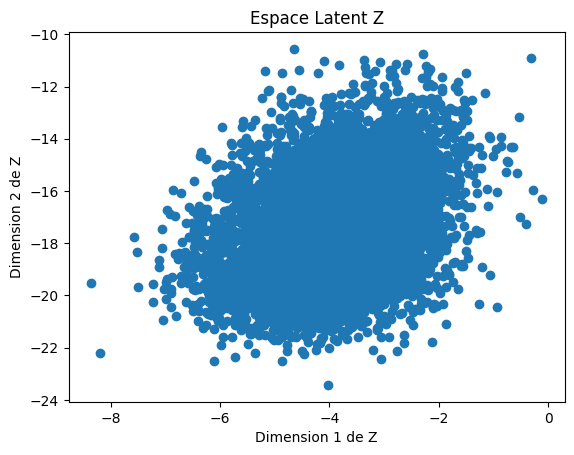

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Encodeur GNN pour apprendre mu_Z
class LatentEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(LatentEncoder, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, latent_dim)
        
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        mu_Z = self.conv2(x, edge_index)
        return mu_Z

# Fonction pour échantillonner Z
def sample_Z(mu_Z, sigma_Z=1.0):
    epsilon = torch.randn_like(mu_Z)  # Bruit gaussien
    Z = mu_Z + sigma_Z * epsilon  # Reparamétrisation
    return Z


# Créer le graphe initial à partir de vos données
initial_graph = create_initial_graph(merged_df, spatial_radius=1.0)
print("Graphe initial :", initial_graph)

# Extraire les caractéristiques des nœuds (exemple : température, vent, etc.)
# Supposons que vos caractéristiques sont dans les colonnes 'temperature', 'u_wind', 'v_wind'
node_features = merged_df[["t2m", "u10", "v10"]].values
node_features = torch.tensor(node_features, dtype=torch.float)

# Paramètres du modèle
input_dim = node_features.shape[1]  # Nombre de caractéristiques par nœud
hidden_dim = 16  # Dimension cachée du GNN
latent_dim = 5   # Dimension de la variable latente Z

# Initialiser l'encodeur
encoder = LatentEncoder(input_dim, hidden_dim, latent_dim)

# Apprendre mu_Z à partir des caractéristiques des nœuds
mu_Z = encoder(node_features, initial_graph.edge_index)
print("mu_Z :", mu_Z.shape)  # Shape: (num_nodes, latent_dim)

# Échantillonner Z
sigma_Z = 1.0  # Écart-type fixé
Z = sample_Z(mu_Z, sigma_Z)
print("Z échantillonné :", Z.shape)  # Shape: (num_nodes, latent_dim)

# Visualiser Z (exemple pour les deux premières dimensions)
import matplotlib.pyplot as plt
plt.scatter(Z[:, 0].detach().numpy(), Z[:, 1].detach().numpy())
plt.xlabel("Dimension 1 de Z")
plt.ylabel("Dimension 2 de Z")
plt.title("Espace Latent Z")
plt.show()

In [ ]:
df = merged_df.copy()

Graphe initial : Data(x=[6200, 3], edge_index=[2, 7208988])
mu_Z : torch.Size([6200, 5])
Z échantillonné : torch.Size([6200, 5])


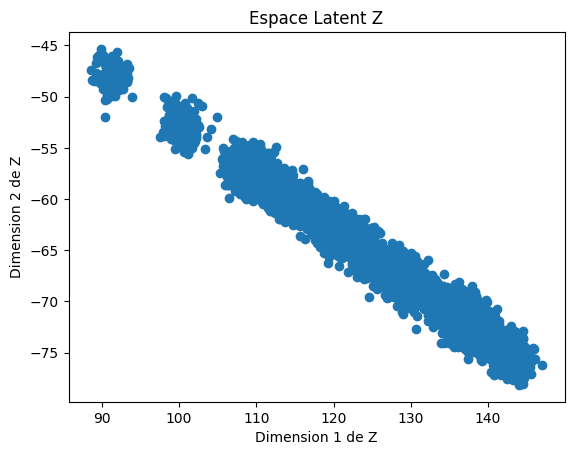

RuntimeError: index 6199 is out of bounds for dimension 0 with size 6199

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import numpy as np

# Encodeur GNN pour apprendre mu_Z
class LatentEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(LatentEncoder, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, latent_dim)
        
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        mu_Z = self.conv2(x, edge_index)
        return mu_Z

# Décodeur pour générer des prédictions à partir de Z
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim))
        
    def forward(self, z):
        return self.mlp(z)

# Fonction pour échantillonner Z
def sample_Z(mu_Z, sigma_Z=1.0):
    epsilon = torch.randn_like(mu_Z)  # Bruit gaussien
    Z = mu_Z + sigma_Z * epsilon  # Reparamétrisation
    return Z

# Créer le graphe initial à partir de vos données
initial_graph = create_initial_graph(merged_df, spatial_radius=1.0)
print("Graphe initial :", initial_graph)

# Extraire les caractéristiques des nœuds (exemple : température, vent, etc.)
# Supposons que vos caractéristiques sont dans les colonnes 'temperature', 'u_wind', 'v_wind'
node_features = merged_df[["t2m", "u10", "v10"]].values
node_features = torch.tensor(node_features, dtype=torch.float)

# Paramètres du modèle
input_dim = node_features.shape[1]  # Nombre de caractéristiques par nœud
hidden_dim = 16  # Dimension cachée du GNN
latent_dim = 5   # Dimension de la variable latente Z

# Initialiser l'encodeur
encoder = LatentEncoder(input_dim, hidden_dim, latent_dim)

# Apprendre mu_Z à partir des caractéristiques des nœuds
mu_Z = encoder(node_features, initial_graph.edge_index)
print("mu_Z :", mu_Z.shape)  # Shape: (num_nodes, latent_dim)

# Échantillonner Z
sigma_Z = 1.0  # Écart-type fixé
Z = sample_Z(mu_Z, sigma_Z)
print("Z échantillonné :", Z.shape)  # Shape: (num_nodes, latent_dim)

# Visualiser Z (exemple pour les deux premières dimensions)
plt.scatter(Z[:, 0].detach().numpy(), Z[:, 1].detach().numpy())
plt.xlabel("Dimension 1 de Z")
plt.ylabel("Dimension 2 de Z")
plt.title("Espace Latent Z")
plt.show()

# Diviser les données en entrée (t) et cible (t+1)
# Supposons que vos données sont triées par temps
X = node_features[:-1]  # Données à t
y = node_features[1:]   # Données à t+1 (cible)

# Paramètres du modèle
output_dim = y.shape[1]  # Dimension de la sortie (identique à l'entrée)

# Initialiser le décodeur
decoder = Decoder(latent_dim, hidden_dim, output_dim)

# Optimiseur
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.01)

# Boucle d'entraînement
num_epochs = 1
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # Apprendre mu_Z à partir des caractéristiques des nœuds
    mu_Z = encoder(X, initial_graph.edge_index)
    
    # Échantillonner Z
    Z = sample_Z(mu_Z)
    
    # Générer des prédictions avec le décodeur
    predictions = decoder(Z)
    
    # Calculer l'erreur (MSE)
    loss = F.mse_loss(predictions, y)
    
    # Rétropropagation et mise à jour des poids
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

# Visualiser les prédictions vs les vraies valeurs
plt.scatter(y[:, 0].detach().numpy(), predictions[:, 0].detach().numpy(), alpha=0.5)
plt.xlabel("Vraies Valeurs (t+1)")
plt.ylabel("Prédictions (t+1)")
plt.title("Prédictions vs Vraies Valeurs")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ligne de référence
plt.show()

Graphe initial : Data(x=[6200, 3], edge_index=[2, 7208988])
mu_Z : torch.Size([6200, 5])
Z échantillonné : torch.Size([6200, 5])


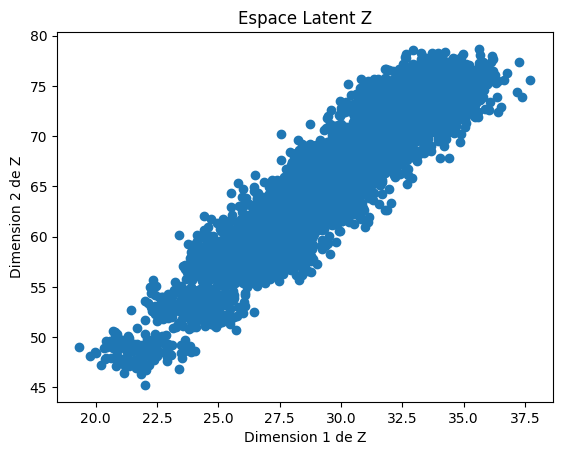

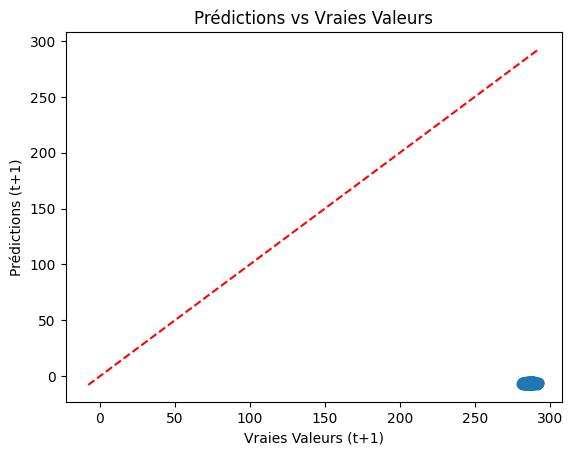

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import numpy as np

# Encodeur GNN pour apprendre mu_Z
class LatentEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(LatentEncoder, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, latent_dim)
        
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        mu_Z = self.conv2(x, edge_index)
        return mu_Z

# Décodeur pour générer des prédictions à partir de Z
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.mlp = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim))
        
    def forward(self, z):
        return self.mlp(z)

# Fonction pour échantillonner Z
def sample_Z(mu_Z, sigma_Z=1.0):
    epsilon = torch.randn_like(mu_Z)  # Bruit gaussien
    Z = mu_Z + sigma_Z * epsilon  # Reparamétrisation
    return Z

# Créer le graphe initial à partir de vos données
initial_graph = create_initial_graph(merged_df, spatial_radius=1.0)
print("Graphe initial :", initial_graph)

# Extraire les caractéristiques des nœuds (exemple : température, vent, etc.)
# Supposons que vos caractéristiques sont dans les colonnes 'temperature', 'u_wind', 'v_wind'
node_features = merged_df[["t2m", "u10", "v10"]].values
node_features = torch.tensor(node_features, dtype=torch.float)

# Paramètres du modèle
input_dim = node_features.shape[1]  # Nombre de caractéristiques par nœud
hidden_dim = 16  # Dimension cachée du GNN
latent_dim = 5   # Dimension de la variable latente Z

# Initialiser l'encodeur
encoder = LatentEncoder(input_dim, hidden_dim, latent_dim)

# Apprendre mu_Z à partir des caractéristiques des nœuds
mu_Z = encoder(node_features, initial_graph.edge_index)
print("mu_Z :", mu_Z.shape)  # Shape: (num_nodes, latent_dim)

# Échantillonner Z
sigma_Z = 1.0  # Écart-type fixé
Z = sample_Z(mu_Z, sigma_Z)
print("Z échantillonné :", Z.shape)  # Shape: (num_nodes, latent_dim)

# Visualiser Z (exemple pour les deux premières dimensions)
plt.scatter(Z[:, 0].detach().numpy(), Z[:, 1].detach().numpy())
plt.xlabel("Dimension 1 de Z")
plt.ylabel("Dimension 2 de Z")
plt.title("Espace Latent Z")
plt.show()

# Diviser les données en entrée (t) et cible (t+1)
# Supposons que vos données sont triées par temps
X = node_features[:-1]  # Données à t
y = node_features[1:]   # Données à t+1 (cible)

# Ajuster l'edge_index pour correspondre à la taille réduite de X
adjusted_edge_index = initial_graph.edge_index[:, initial_graph.edge_index[0] < X.shape[0]]
adjusted_edge_index = adjusted_edge_index[:, adjusted_edge_index[1] < X.shape[0]]

# Paramètres du modèle
output_dim = y.shape[1]  # Dimension de la sortie (identique à l'entrée)

# Initialiser le décodeur
decoder = Decoder(latent_dim, hidden_dim, output_dim)

# Optimiseur
optimizer = torch.optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=0.01)

# Boucle d'entraînement
num_epochs = 1
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # Apprendre mu_Z à partir des caractéristiques des nœuds
    mu_Z = encoder(X, adjusted_edge_index)
    
    # Échantillonner Z
    Z = sample_Z(mu_Z)
    
    # Générer des prédictions avec le décodeur
    predictions = decoder(Z)
    
    # Calculer l'erreur (MSE)
    loss = F.mse_loss(predictions, y)
    
    # Rétropropagation et mise à jour des poids
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

# Visualiser les prédictions vs les vraies valeurs
plt.scatter(y[:, 0].detach().numpy(), predictions[:, 0].detach().numpy(), alpha=0.5)
plt.xlabel("Vraies Valeurs (t+1)")
plt.ylabel("Prédictions (t+1)")
plt.title("Prédictions vs Vraies Valeurs")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ligne de référence
plt.show()

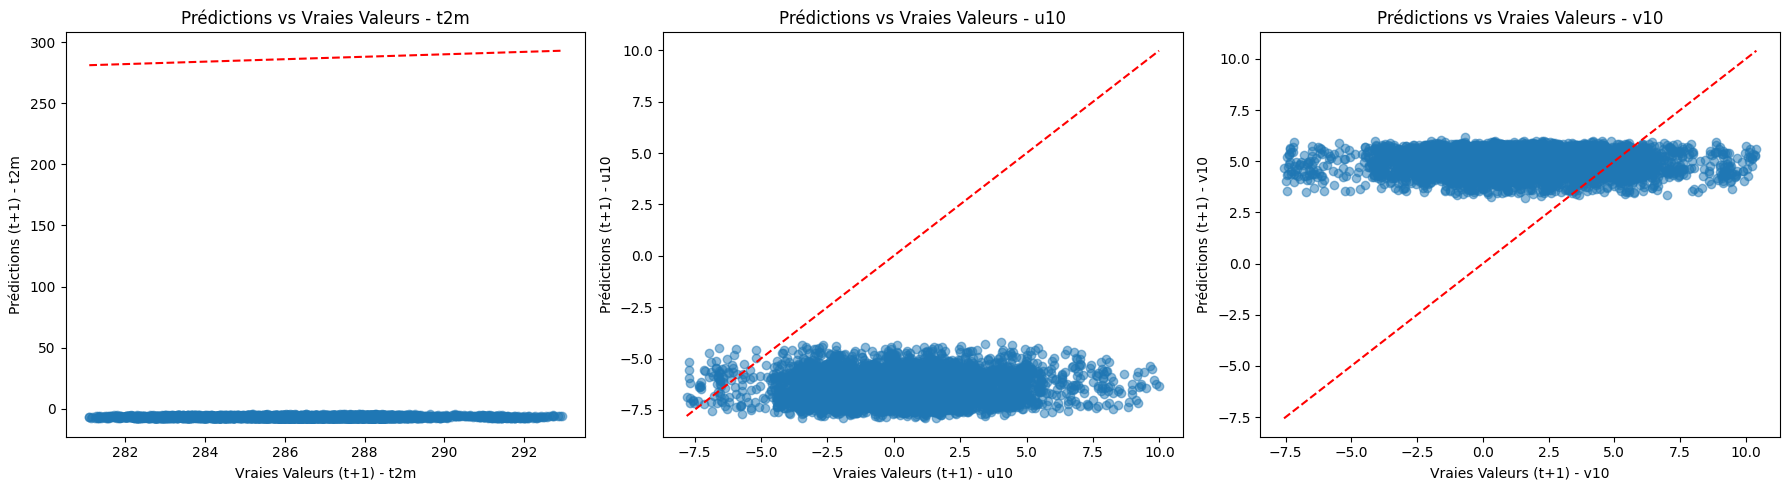

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(["t2m", "u10", "v10"]):
    axes[i].scatter(y[:, i].detach().numpy(), predictions[:, i].detach().numpy(), alpha=0.5)
    axes[i].set_xlabel(f"Vraies Valeurs (t+1) - {feature}")
    axes[i].set_ylabel(f"Prédictions (t+1) - {feature}")
    axes[i].set_title(f"Prédictions vs Vraies Valeurs - {feature}")
    axes[i].plot([y[:, i].min(), y[:, i].max()], [y[:, i].min(), y[:, i].max()], 'r--')  # Reference line

plt.tight_layout()
plt.show()

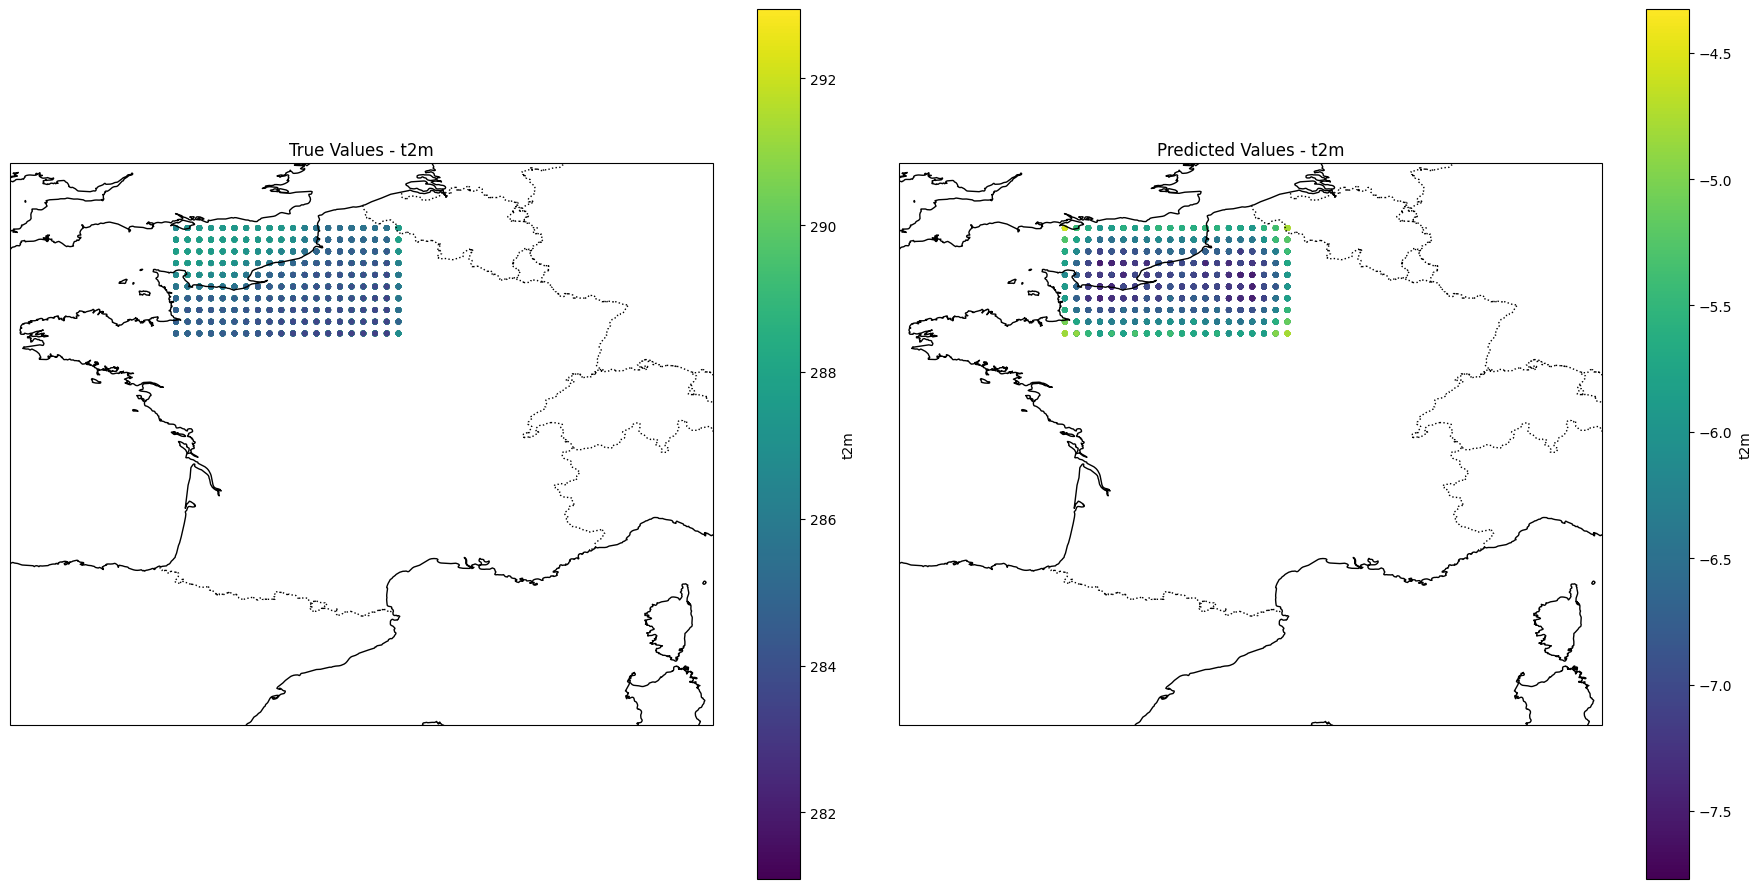

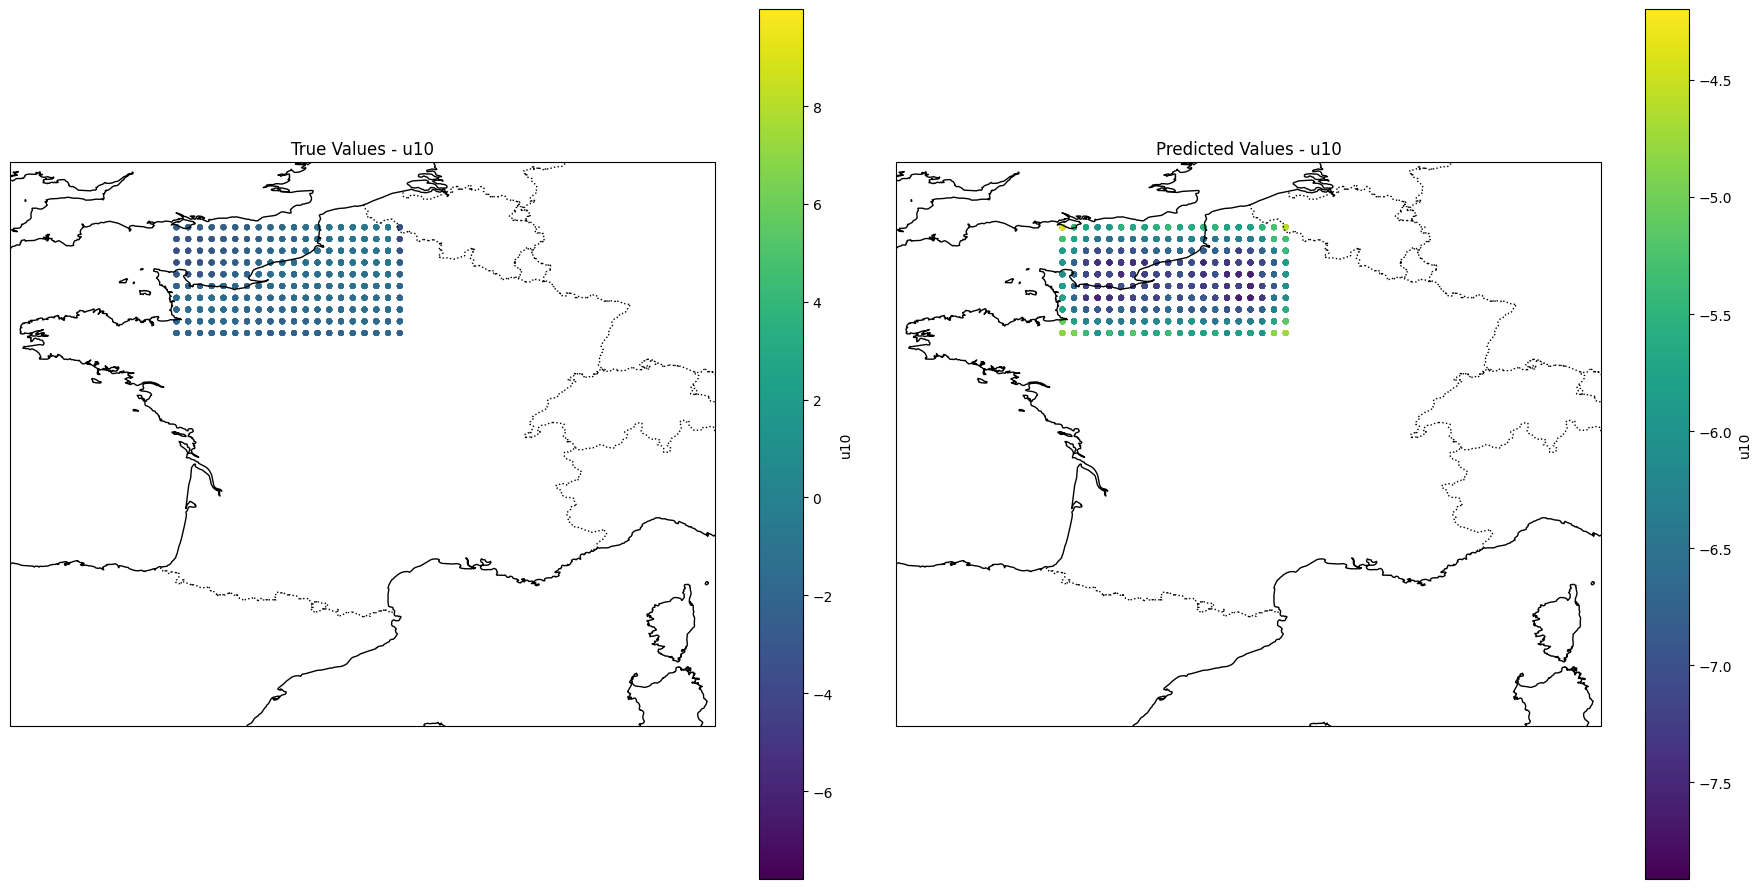

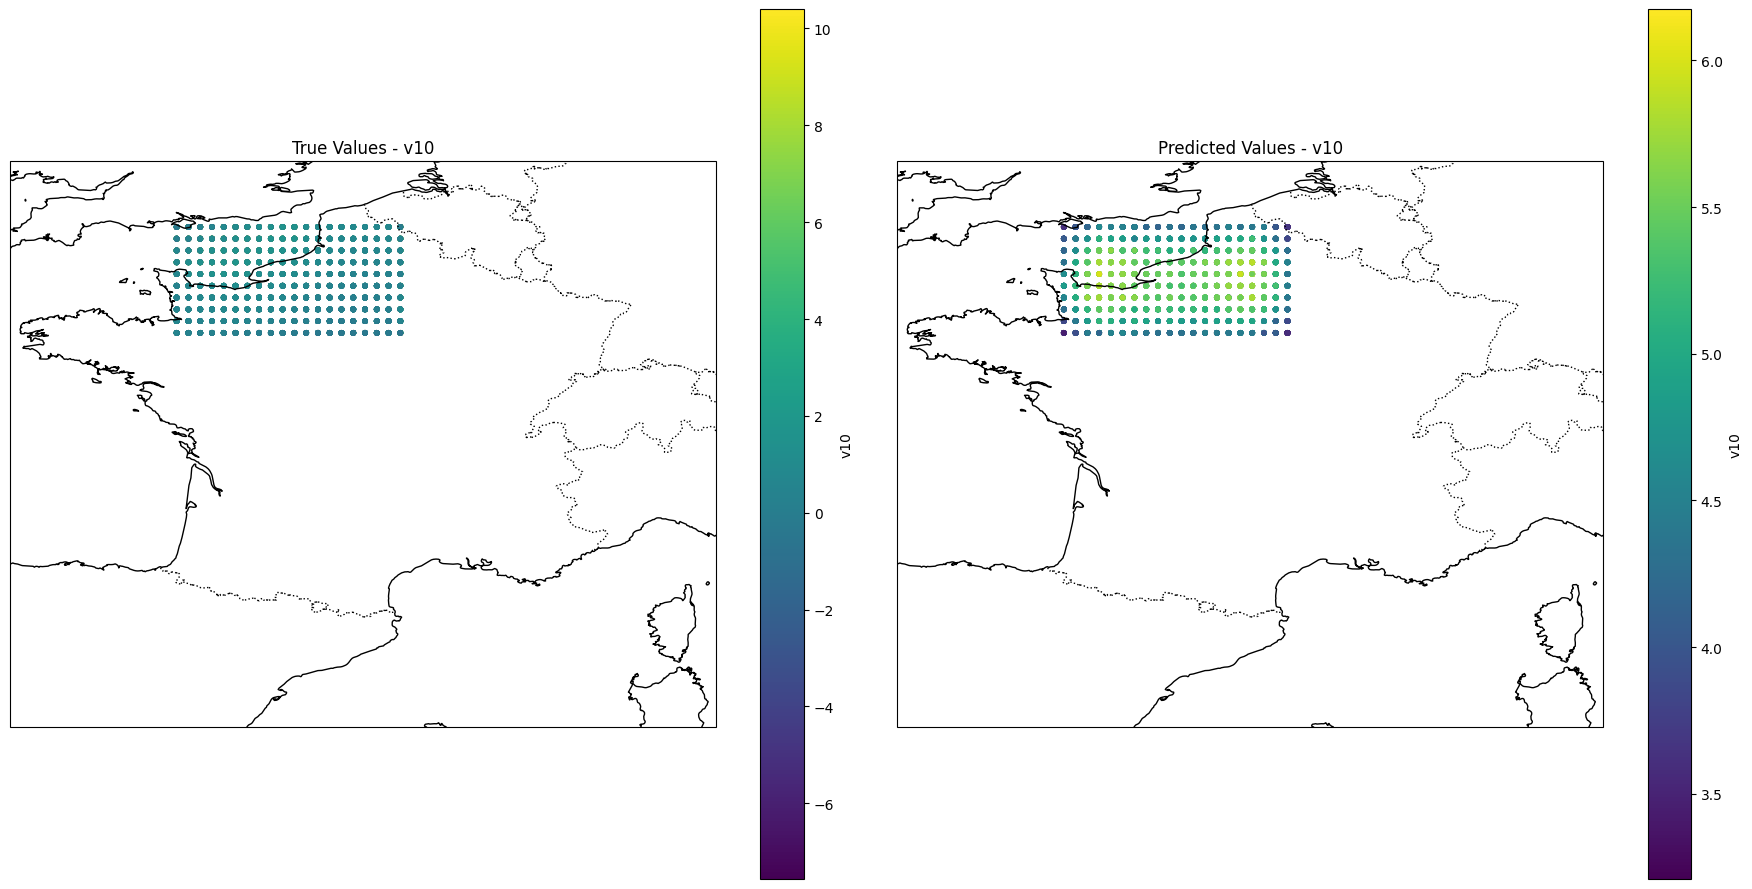

In [28]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Function to plot true and predicted values on a map
def plot_maps(true_values, predicted_values, coordinates, feature_name):
    fig, axes = plt.subplots(1, 2, figsize=(18, 9), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Plot true values
    ax = axes[0]
    ax.set_extent([-5, 10, 40, 52], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    sc = ax.scatter(coordinates[:, 1], coordinates[:, 0], c=true_values, cmap='viridis', s=10, transform=ccrs.PlateCarree())
    ax.set_title(f'True Values - {feature_name}')
    plt.colorbar(sc, ax=ax, orientation='vertical', label=feature_name)
    
    # Plot predicted values
    ax = axes[1]
    ax.set_extent([-5, 10, 40, 52], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    sc = ax.scatter(coordinates[:, 1], coordinates[:, 0], c=predicted_values, cmap='viridis', s=10, transform=ccrs.PlateCarree())
    ax.set_title(f'Predicted Values - {feature_name}')
    plt.colorbar(sc, ax=ax, orientation='vertical', label=feature_name)
    
    plt.tight_layout()
    plt.show()

# Assuming coordinates are in merged_df
coordinates = merged_df[["latitude", "longitude"]].values

# Plot maps for each feature
for i, feature in enumerate(["t2m", "u10", "v10"]):
    plot_maps(y[:, i].detach().numpy(), predictions[:, i].detach().numpy(), coordinates[:-1], feature)